In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

In [24]:
df = pd.read_csv('./data/pay_history.csv')

In [3]:
df.head()

,EmployeeID,DepartmentID,RateChangeDate,Rate,PayFrequency,LoginID,OrganizationLevel,JobTitle,BirthDate,MaritalStatus,Gender,HireDate,SalariedFlag,VacationHours,SickLeaveHours,CurrentFlag,ShiftID,StartDate,EndDate,ModifiedDate,DepartmentName,Sub-Department
0,40,7,00:00.0,25.00,2,adventure-works\jolynn0,3.0,Production Supervisor - WC60,1/13/1965,S,F,12/23/2016,0,82,61,1,3,12/23/2016,NaN,00:00.0,Production,Manufacturing
1,41,7,00:00.0,12.45,1,adventure-works\bryan0,4.0,Production Technician - WC60,8/25/1982,S,M,1/19/2018,0,35,37,1,3,1/19/2018,NaN,00:00.0,Production,Manufacturing
2,42,7,00:00.0,12.45,1,adventure-works\james0,4.0,Production Technician - WC60,7/23/1993,M,M,12/25/2017,0,39,39,1,3,12/25/2017,NaN,00:00.0,Production,Manufacturing
3,43,7,00:00.0,12.45,1,adventure-works\nancy0,4.0,Production Technician - WC60,11/17/1997,M,F,12/31/2017,0,34,37,1,3,12/31/2017,NaN,00:00.0,Production,Manufacturing
4,44,7,00:00.0,12.45,1,adventure-works\simon0,4.0,Production Technician - WC60,5/15/1999,S,M,12/6/2017,0,38,39,1,3,12/6/2017,NaN,00:00.0,Production,Manufacturing


In [4]:
department_df = df.groupby('DepartmentName', as_index=False).agg({'EmployeeID': 'nunique'}).sort_values(by='EmployeeID', ascending=False)

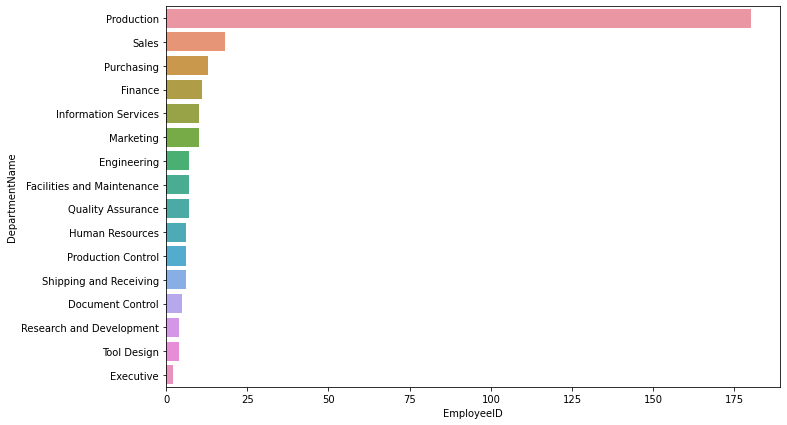

In [5]:
plt.figure(figsize=(11, 7))
sns.barplot(y=department_df['DepartmentName'], x=department_df['EmployeeID'])
plt.show()

In [26]:
df['StartDate'] = pd.to_datetime(df['StartDate'])
df['HireDate'] = pd.to_datetime(df['HireDate'])

In [11]:
df.sort_values(by='HireDate')

,EmployeeID,DepartmentID,RateChangeDate,Rate,PayFrequency,LoginID,OrganizationLevel,JobTitle,BirthDate,MaritalStatus,Gender,HireDate,SalariedFlag,VacationHours,SickLeaveHours,CurrentFlag,ShiftID,StartDate,EndDate,ModifiedDate,DepartmentName,Sub-Department
176,28,7,00:00.0,12.4500,1,adventure-works\guy1,4.0,Production Technician - WC60,3/11/1997,M,M,2015-06-28,0,21,30,1,1,2015-06-28,NaN,00:00.0,Production,Manufacturing
146,17,4,00:00.0,13.4615,2,adventure-works\kevin0,2.0,Marketing Assistant,4/30/1996,S,M,2016-01-24,0,42,41,1,1,2016-01-24,NaN,00:00.0,Marketing,Sales and Marketing
115,3,1,00:00.0,43.2692,2,adventure-works\roberto0,2.0,Engineering Manager,11/10/1983,M,M,2016-11-08,1,2,21,1,1,2016-11-08,NaN,00:00.0,Engineering,Research and Development
116,4,1,00:00.0,8.6200,2,adventure-works\rob0,3.0,Senior Tool Designer,12/21/1983,S,M,2016-12-02,0,48,80,1,1,2016-12-02,5/28/2019,00:00.0,Engineering,Research and Development
121,4,2,00:00.0,8.6200,2,adventure-works\rob0,3.0,Senior Tool Designer,12/21/1983,S,M,2016-12-02,0,48,80,1,1,2019-05-29,NaN,00:00.0,Tool Design,Research and Development
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,290,3,00:00.0,23.0769,2,adventure-works\ranjit0,3.0,Sales Representative,9/27/1984,S,M,2021-05-28,1,34,37,1,1,2021-05-28,NaN,00:00.0,Sales,Sales and Marketing
137,284,3,00:00.0,23.0769,2,adventure-works\tete0,3.0,Sales Representative,1/3/1987,M,M,2021-09-28,1,39,39,1,1,2021-09-28,NaN,00:00.0,Sales,Sales and Marketing
138,285,3,00:00.0,48.1010,2,adventure-works\syed0,2.0,Pacific Sales Manager,1/9/1984,M,M,2022-03-12,1,20,30,1,1,2022-03-12,NaN,00:00.0,Sales,Sales and Marketing
139,286,3,00:00.0,23.0769,2,adventure-works\lynn0,3.0,Sales Representative,2/12/1986,S,F,2022-05-28,1,36,38,1,1,2022-05-28,NaN,00:00.0,Sales,Sales and Marketing


In [27]:
from datetime import datetime
datetime.now()

datetime.datetime(2022, 12, 8, 12, 1, 27, 635436)

In [35]:
df['YearsWorked'] = ((datetime.now() - df['HireDate']).dt.days / 365.25) // 1

In [36]:
years_df = df.groupby('YearsWorked', as_index=False).agg({'Rate':'mean'}).sort_values('YearsWorked')

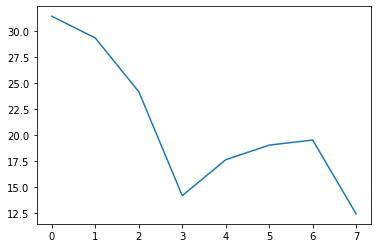

In [37]:
plt.plot(years_df['YearsWorked'], years_df['Rate'])

In [38]:
years_df

,YearsWorked,Rate
0,0.0,31.418267
1,1.0,29.332925
2,2.0,24.180608
3,3.0,14.204716
4,4.0,17.647529
5,5.0,19.051056
6,6.0,19.538140
7,7.0,12.450000


In [53]:
years_df = df.sort_values(by="HireDate").drop_duplicates(subset=['EmployeeID'], keep='last')

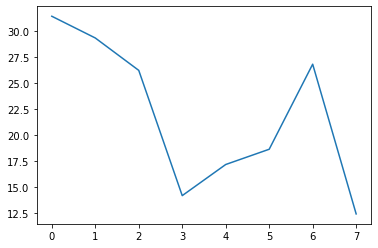

In [55]:
years_df = years_df.groupby('YearsWorked', as_index=False).agg({'Rate':'median'}).sort_values('YearsWorked')
plt.plot(years_df['YearsWorked'], years_df['Rate'])